# a) Optimizing a linear regression model using gradient descent without using autograd Library

[0.49168448] [1.99989165]


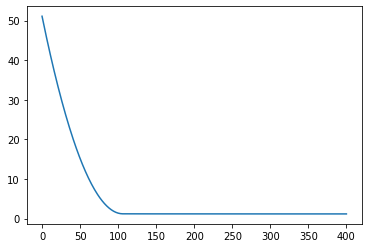

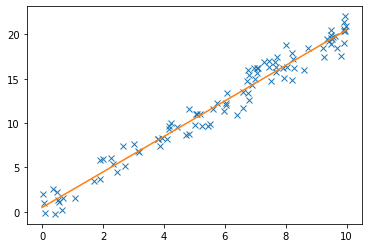

In [1]:
# import stuff
#from autograd import grad
import numpy as np
import matplotlib.pyplot as plt

# define model 


def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# least squares function
def least_squares(w,x,y):
    # loop to compute cost contribution from each input-output pair
    cost = np.sum((model(x,w)-y)**2)
    return cost/(y.size)

def gradient(w,x,y):
    X_bar = np.r_[np.ones((1, y.size)), x]    
    return np.dot(X_bar, (model(x,w) - y).T)

# gradient descent function
def gradient_descent(g, step, max_its, w, p):    
    # compute gradient
    #gradient = grad2(g)
    # gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w,x,y)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd': # diminishing step
            alpha = 1/(k+1)
        else: # constant step
            alpha = step
        w = w - alpha*grad_eval_norm
# record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history


# create data set and test
x = 10*np.random.rand(1,100)
y = .5 + 2*x + np.random.randn(1,100)
plt.figure(1)
plt.plot(x.T,y.T,'x')

def c(t):
    c = least_squares(t,x,y)
    return c

w = np.array([[0.], [1.]])
a, b = gradient_descent(c,0.01,400,w,0)
plt.figure(0)
plt.plot(b)
plt.figure(1)
xp=[0, 10]
plt.plot(xp,a[400][0]+a[400][1]*xp)

# print weights
print(a[400][0],a[400][1])


#  b) Training Using Newton's Method


In [5]:


P =100
# Creating dataset with size P
X = 0.2 + np.random.randn(P,1)
X_b = np.c_[np.ones((P,1)), X]
Y = 0.5 + 2*X + np.random.randn(P,1)

# Finding the optimal w
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

print(w)

[[0.57708873]
 [2.06808856]]


# Training Using Sciket-Learn 

[0.48123894] [[1.99574801]]


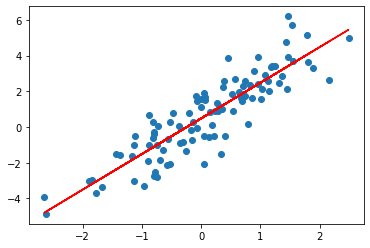

In [3]:
from sklearn.linear_model import LinearRegression


# Creating dataset with size P
X = 0.2 + np.random.randn(P,1)
X_b = np.c_[np.ones((P,1)), X]
Y = 0.5 + 2*X + np.random.randn(P,1)

Lin_reg = LinearRegression()
Lin_reg.fit(X,Y)
print(Lin_reg.intercept_, Lin_reg.coef_)
#Lin_reg.intercept_ = 3
plt.figure(1)
plt.scatter(X,Y)
plt.plot(X, Lin_reg.predict(X),'r-')